In [11]:
import gzip
import shutil
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os

# Function to decompress a .gz file to a .dat file
def decompress_gz(gz_file_path, decompressed_file_path):
    with gzip.open(gz_file_path, 'rb') as f_in:
        with open(decompressed_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    print(f"Decompressed {gz_file_path} to {decompressed_file_path}")

# Function to convert binary GSMaP data to NetCDF
def convert_binary_to_nc(binary_file, nc_file, nx=3600, ny=1200, dx=0.1, dy=0.1):
    # Define the coordinates
    lon = np.linspace(0 + dx / 2, 360 - dx / 2, nx)
    lat = np.linspace(60 - dy / 2, -60 + dy / 2, ny)

    # Read the binary data
    data = np.fromfile(binary_file, dtype=np.float32).reshape(ny, nx)
    
    # Create an xarray Dataset
    ds = xr.Dataset(
        {
            'precipitation': (('lat', 'lon'), data)
        },
        coords={
            'lon': lon,
            'lat': lat
        }
    )
    
    # Set attributes
    ds['precipitation'].attrs['units'] = 'mm/hr'
    ds['precipitation'].attrs['long_name'] = 'GSMaP Precipitation'
    
    # Save to NetCDF
    ds.to_netcdf(nc_file)
    print(f"Converted binary file to NetCDF: {nc_file}")

# Function to extract useful coordinates
def extract_useful_coordinates(nc_file, subset_nc_file, area_of_interest):
    # Open the NetCDF file
    ds = xr.open_dataset(nc_file)

    # Subset the data based on the area of interest
    subset_ds = ds.sel(
        lon=slice(area_of_interest['lon_min'], area_of_interest['lon_max']),
        lat=slice(area_of_interest['lat_min'], area_of_interest['lat_max'])
    )

    # Plot the subsetted data
    plt.figure(figsize=(10, 6))
    subset_ds['precipitation'].plot(cmap='viridis')
    plt.title('Subsetted GSMaP Precipitation Data')
    plt.show()

    # Save the subsetted data to a new NetCDF file
    subset_ds.to_netcdf(subset_nc_file)
    print(f"Subsetted data saved to {subset_nc_file}")

# Paths to the files


# Define the area of interest (lat_min, lon_min, lat_max, lon_max)
area_of_interest = {
    'lat_min': -7.29,
    'lat_max': 9.972,
    'lon_min': 93.16,
    'lon_max': 110.422
}

# Decompress .gz to .dat
decompress_gz(gz_file_path, binary_file_path)

# Convert binary to NetCDF
convert_binary_to_nc(binary_file_path, nc_file_path)

# Extract useful coordinates
extract_useful_coordinates(nc_file_path, subset_nc_file_path, area_of_interest)


Decompressed GSMaP/gsmap_gauge.20240702.0500.dat.gz to gsmap_gauge.20240702.0500.dat
Converted binary file to NetCDF: GSMaP/gsmap_gauge_20240702_0500.nc


TypeError: No numeric data to plot.

<Figure size 1000x600 with 0 Axes>

Decompressed GSMaP/gsmap_gauge.20240702.0500.dat.gz to gsmap_gauge.20240702.0500.dat
Converted binary file to NetCDF: GSMaP/gsmap_gauge_20240702_0500.nc
Dataset latitude bounds: -59.95, 59.95
Dataset longitude bounds: 0.05, 359.95


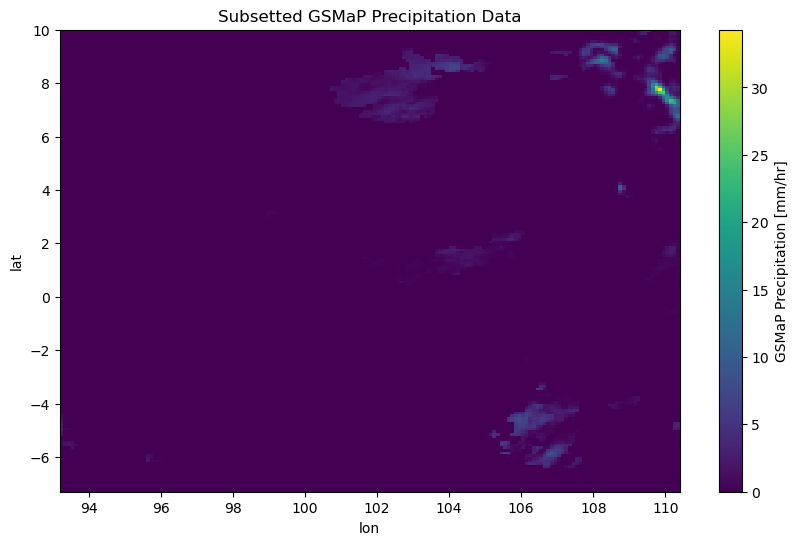

Subsetted data saved to subset_gsmap_gauge_20240702_0500.nc


In [5]:
import gzip
import shutil
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os

# Function to decompress a .gz file to a .dat file
def decompress_gz(gz_file_path, decompressed_file_path):
    with gzip.open(gz_file_path, 'rb') as f_in:
        with open(decompressed_file_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    print(f"Decompressed {gz_file_path} to {decompressed_file_path}")

# Function to convert binary GSMaP data to NetCDF
def convert_binary_to_nc(binary_file, nc_file, nx=3600, ny=1200, dx=0.1, dy=0.1):
    # Define the coordinates
    lon = np.linspace(0 + dx / 2, 360 - dx / 2, nx)
    lat = np.linspace(60 - dy / 2, -60 + dy / 2, ny)

    # Read the binary data
    data = np.fromfile(binary_file, dtype=np.float32).reshape(ny, nx)
    
    # Create an xarray Dataset
    ds = xr.Dataset(
        {
            'precipitation': (('lat', 'lon'), data)
        },
        coords={
            'lon': lon,
            'lat': lat
        }
    )
    
    # Set attributes
    ds['precipitation'].attrs['units'] = 'mm/hr'
    ds['precipitation'].attrs['long_name'] = 'GSMaP Precipitation'
    
    # Save to NetCDF
    ds.to_netcdf(nc_file)
    print(f"Converted binary file to NetCDF: {nc_file}")

# Function to extract useful coordinates
def extract_useful_coordinates(nc_file, subset_nc_file, area_of_interest):
    # Open the NetCDF file
    ds = xr.open_dataset(nc_file)
    
    # Print the latitude and longitude bounds of the dataset
    print(f"Dataset latitude bounds: {ds['lat'].min().values}, {ds['lat'].max().values}")
    print(f"Dataset longitude bounds: {ds['lon'].min().values}, {ds['lon'].max().values}")

    # Subset the data based on the area of interest
    subset_ds = ds.sel(
        lon=slice(area_of_interest['lon_min'], area_of_interest['lon_max']),
        lat=slice(area_of_interest['lat_max'], area_of_interest['lat_min'])
    )

    # Check if the subsetted data is empty
    if subset_ds['precipitation'].size == 0 or subset_ds['precipitation'].isnull().all():
        print("No numeric data to plot.")
        return

    # Plot the subsetted data
    plt.figure(figsize=(10, 6))
    subset_ds['precipitation'].plot(cmap='viridis')
    plt.title('Subsetted GSMaP Precipitation Data')
    plt.show()

    # Save the subsetted data to a new NetCDF file
    subset_ds.to_netcdf(subset_nc_file)
    print(f"Subsetted data saved to {subset_nc_file}")

# Paths to the files
gz_file_path = 'GSMaP/gsmap_gauge.20240702.0500.dat.gz'
binary_file_path = 'gsmap_gauge.20240702.0500.dat'
nc_file_path = 'GSMaP/gsmap_gauge_20240702_0500.nc'
subset_nc_file_path = 'subset_gsmap_gauge_20240702_0500.nc'

# Define the area of interest (lat_min, lon_min, lat_max, lon_max)
area_of_interest = {
    'lat_min': -7.29,
    'lat_max': 9.972,
    'lon_min': 93.16,
    'lon_max': 110.422
}

# Decompress .gz to .dat
decompress_gz(gz_file_path, binary_file_path)

# Convert binary to NetCDF
convert_binary_to_nc(binary_file_path, nc_file_path)

# Extract useful coordinates
extract_useful_coordinates(nc_file_path, subset_nc_file_path, area_of_interest)


In [1]:
import ftplib
import os
import gzip
import xarray as xr
import numpy as np
from tqdm import tqdm
from datetime import datetime
import calendar

def convert_binary_to_nc(binary_file, nc_file, nx=3600, ny=1200, dx=0.1, dy=0.1):
    # Define the coordinates
    lon = np.linspace(0 + dx / 2, 360 - dx / 2, nx)
    lat = np.linspace(60 - dy / 2, -60 + dy / 2, ny)

    # Read the binary data
    data = np.fromfile(binary_file, dtype=np.float32)
    
    # Check if the data size matches the expected size
    if data.size != nx * ny:
        print(f"Error: Data size {data.size} does not match expected size {nx * ny} for file {binary_file}")
        return False

    data = data.reshape(ny, nx)
    
    # Create an xarray Dataset
    ds = xr.Dataset(
        {
            'precipitation': (('lat', 'lon'), data)
        },
        coords={
            'lon': lon,
            'lat': lat
        }
    )
    
    # Set attributes
    ds['precipitation'].attrs['units'] = 'mm/hr'
    ds['precipitation'].attrs['long_name'] = 'GSMaP Precipitation'
    
    # Save to NetCDF
    ds.to_netcdf(nc_file)
    print(f"Converted binary file to NetCDF: {nc_file}")
    return True

def extract_useful_coordinates(nc_file, subset_nc_file, area_of_interest):
    # Open the NetCDF file
    ds = xr.open_dataset(nc_file)
    
    # Print the latitude and longitude bounds of the dataset
    print(f"Dataset latitude bounds: {ds['lat'].min().values}, {ds['lat'].max().values}")
    print(f"Dataset longitude bounds: {ds['lon'].min().values}, {ds['lon'].max().values}")

    # Subset the data based on the area of interest
    subset_ds = ds.sel(
        lon=slice(area_of_interest['lon_min'], area_of_interest['lon_max']),
        lat=slice(area_of_interest['lat_max'], area_of_interest['lat_min'])
    )

    # Check if the subsetted data is empty
    if subset_ds['precipitation'].size == 0 or subset_ds['precipitation'].isnull().all():
        print("No numeric data to plot.")
        return False
    
    # Save the subsetted data to a new NetCDF file
    subset_ds.to_netcdf(subset_nc_file)
    print(f"Extracted useful coordinates to: {subset_nc_file}")
    return True

def download_and_process_file(ftp, file, local_dir, extracted_dir, area_of_interest, year, month):
    local_filepath = os.path.join(local_dir, file)
    subset_nc_file_path = os.path.join(extracted_dir, str(year), month, file.replace('.gz', '.nc'))

    try:
        with open(local_filepath, 'wb') as local_file:
            ftp.retrbinary(f'RETR {file}', local_file.write)
            print(f"Downloaded: {file}")

        # Unzip the file
        with gzip.open(local_filepath, 'rb') as f_in:
            with open(local_filepath.replace('.gz', ''), 'wb') as f_out:
                f_out.write(f_in.read())

        # Convert binary to NetCDF
        if not convert_binary_to_nc(local_filepath.replace('.gz', ''), local_filepath.replace('.gz', '.nc')):
            return
        
        # Ensure year/month subdirectories exist
        os.makedirs(os.path.dirname(subset_nc_file_path), exist_ok=True)
        
        # Extract useful coordinates
        extract_useful_coordinates(local_filepath.replace('.gz', '.nc'), subset_nc_file_path, area_of_interest)
        
        # Clean up
        os.remove(local_filepath)
        os.remove(local_filepath.replace('.gz', ''))
        os.remove(local_filepath.replace('.gz', '.nc'))
    except Exception as e:
        print(f"Error processing {file}: {e}")

def download_gz_files(ftp_host, ftp_user, ftp_password, remote_dir, local_dir, extracted_dir, start_year, end_year, area_of_interest):
    try:
        # Connect to FTP server
        ftp = ftplib.FTP(ftp_host)
        ftp.login(user=ftp_user, passwd=ftp_password)

        # Ensure local and extracted directories exist
        os.makedirs(local_dir, exist_ok=True)
        os.makedirs(extracted_dir, exist_ok=True)

        # Iterate through the years in the specified range
        for year in range(start_year, end_year + 1):
            year_dir = f"{remote_dir}/{year}"
            try:
                ftp.cwd(year_dir)
                print(f"Entering directory: {year_dir}")
            except ftplib.error_perm:
                print(f"Skipping {year_dir}, not a directory.")
                continue

            # List all month directories
            months = ftp.nlst()
            months.sort()
            for month in months:
                month_dir = f"{year_dir}/{month}"
                try:
                    ftp.cwd(month_dir)
                    print(f"Entering directory: {month_dir}")
                except ftplib.error_perm:
                    print(f"Skipping {month_dir}, not a directory.")
                    continue

                # List all day directories
                days = ftp.nlst()
                days.sort()
                for day in days:
                    day_dir = f"{month_dir}/{day}"
                    try:
                        ftp.cwd(day_dir)
                        print(f"Entering directory: {day_dir}")
                    except ftplib.error_perm:
                        print(f"Skipping {day_dir}, not a directory.")
                        continue

                    # List all .gz files
                    files = ftp.nlst()
                    gz_files = [file for file in files if file.endswith('.gz')]

                    # Ensure local day directory exists
                    local_day_dir = os.path.join(local_dir, str(year), month, day)
                    if not os.path.exists(local_day_dir):
                        os.makedirs(local_day_dir)

                    # Download and process each .gz file
                    for file in gz_files:
                        download_and_process_file(ftp, file, local_day_dir, extracted_dir, area_of_interest, year, month)

                    # Move back to the month directory
                    ftp.cwd('..')

                # Move back to the year directory
                ftp.cwd('..')

            # Move back to the root directory
            ftp.cwd('..')

        # Close the FTP connection
        ftp.quit()
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    ftp_host = 'hokusai.eorc.jaxa.jp'
    ftp_user = 'rainmap'
    ftp_password = 'Niskur+1404'
    remote_dir = '/realtime_ver/v8/archive'
    local_dir = r'C:\Users\userAdmin\Desktop\Climate Database\GSMaP\dump'
    extracted_dir = r'C:\Users\userAdmin\Desktop\Climate Database\GSMaP\extracted'
    
    start_year = 2014  # Set your desired start year
    end_year = 2015    # Set your desired end year
    
    # Define the area of interest (lat_min, lon_min, lat_max, lon_max)
    area_of_interest = {'lat_min': -7.29, 'lon_min': 93.16, 'lat_max': 9.972, 'lon_max': 110.422}
    
    # Download and process files
    download_gz_files(ftp_host, ftp_user, ftp_password, remote_dir, local_dir, extracted_dir, start_year, end_year, area_of_interest)

    print("Download, extraction, and conversion processes completed.")


Entering directory: /realtime_ver/v8/archive/2014
Entering directory: /realtime_ver/v8/archive/2014/01
Entering directory: /realtime_ver/v8/archive/2014/01/01
Downloaded: gsmap_nrt.20140101.0200.dat.gz
Converted binary file to NetCDF: C:\Users\userAdmin\Desktop\Climate Database\GSMaP\dump\2014\01\01\gsmap_nrt.20140101.0200.dat.nc
Dataset latitude bounds: -59.95, 59.95
Dataset longitude bounds: 0.05, 359.95
Extracted useful coordinates to: C:\Users\userAdmin\Desktop\Climate Database\GSMaP\extracted\2014\01\gsmap_nrt.20140101.0200.dat.nc
Downloaded: gsmap_nrt.20140101.1800.dat.gz
Converted binary file to NetCDF: C:\Users\userAdmin\Desktop\Climate Database\GSMaP\dump\2014\01\01\gsmap_nrt.20140101.1800.dat.nc
Dataset latitude bounds: -59.95, 59.95
Dataset longitude bounds: 0.05, 359.95
Extracted useful coordinates to: C:\Users\userAdmin\Desktop\Climate Database\GSMaP\extracted\2014\01\gsmap_nrt.20140101.1800.dat.nc
Downloaded: gsmap_nrt.20140101.1500.dat.gz
Converted binary file to NetCDF: